In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("stars_class.csv", index_col=0, delimiter= ';')
df.head(10)

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
class,,,,,,,,,,,,,,
GALAXY,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,0.634794,5812,56354,171
GALAXY,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,0.779136,10445,58158,427
GALAXY,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,0.644195,4576,55592,299
GALAXY,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,0.932346,9149,58039,775
GALAXY,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,0.116123,6121,56187,842
QSO,340.995120,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,3,110,1.424659,5026,55855,741
QSO,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,2,462,0.586455,11069,58456,113
GALAXY,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,2,346,0.477009,6183,56210,15
GALAXY,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,5,108,0.660012,6625,56386,719


In [3]:
df.shape # linha, coluna

(438, 14)

In [7]:
#auto-escalar os dados

# 1 - calcular a média de cada variável
dfm = df.mean()

# 2 - calcular o desvio padrão de cada variável
dfdp = df.std()

# 3 - escalar os dados
dfauto = (df - dfm) / dfdp

dfauto.head()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
class,,,,,,,,,,,,,,
GALAXY,-0.459995,0.662586,0.699546,0.725153,0.340389,0.025944,0.024863,-0.622773,-1.098286,-0.834035,0.048627,0.193067,0.383573,-1.023423
GALAXY,-0.377115,0.589086,1.121884,1.012279,1.544918,1.214224,1.662508,-0.199827,1.279223,-0.497493,0.246132,1.798778,1.408539,-0.070076
GALAXY,-0.401037,0.848548,1.350014,0.925617,0.458535,0.134447,0.114602,-0.622773,-1.098286,-0.489080,0.061491,-0.235307,-0.049367,-0.546750
GALAXY,1.381862,-1.318641,-0.119030,1.499618,1.009715,0.820435,0.289847,-0.351011,-0.305783,0.301792,0.455771,1.349609,1.340928,1.225880
GALAXY,1.441199,-0.018597,-1.387608,-1.696898,-1.803868,-1.866280,-1.861597,1.462280,-0.305783,-0.346050,-0.661075,0.300161,0.288690,1.475389


In [8]:
# matriz de correlação

corr = dfauto.iloc[:,0:14].corr()
corr

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
alpha,1.000000,0.014482,-0.011099,-0.034727,-0.042558,-0.045243,-0.042351,0.178344,0.066293,-0.408621,-0.019429,-0.051404,-0.027850,-0.005645
delta,0.014482,1.000000,-0.069214,-0.087917,-0.102865,-0.131325,-0.124173,-0.381335,0.003555,-0.271581,-0.124927,-0.071662,-0.086584,-0.007247
u,-0.011099,-0.069214,1.000000,0.805054,0.660865,0.561069,0.488374,0.151886,-0.095792,-0.048131,0.113362,0.322848,0.370979,0.162977
g,-0.034727,-0.087917,0.805054,1.000000,0.932146,0.843307,0.772338,0.171281,-0.048286,0.016294,0.312563,0.582159,0.606228,0.186732
r,-0.042558,-0.102865,0.660865,0.932146,1.000000,0.953380,0.919626,0.181755,-0.022535,0.075525,0.426990,0.673197,0.680975,0.159611
i,-0.045243,-0.131325,0.561069,0.843307,0.953380,1.000000,0.967970,0.184969,-0.026011,0.131492,0.501819,0.680937,0.683457,0.142705
z,-0.042351,-0.124173,0.488374,0.772338,0.919626,0.967970,1.000000,0.177294,-0.029598,0.142782,0.512538,0.685904,0.687435,0.153055
run_ID,0.178344,-0.381335,0.151886,0.171281,0.181755,0.184969,0.177294,1.000000,-0.067904,0.179640,0.114803,0.343968,0.371654,0.106058
cam_col,0.066293,0.003555,-0.095792,-0.048286,-0.022535,-0.026011,-0.029598,-0.067904,1.000000,-0.042158,-0.015587,-0.030254,-0.044614,0.062084
field_ID,-0.408621,-0.271581,-0.048131,0.016294,0.075525,0.131492,0.142782,0.179640,-0.042158,1.000000,0.144678,0.160859,0.134168,-0.020750


<Axes: >

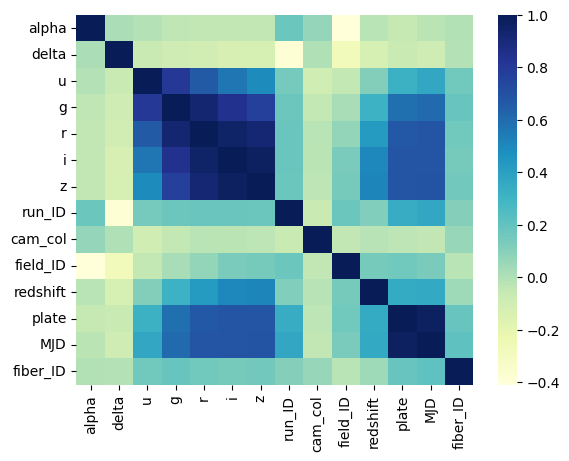

In [9]:
# heatmap

sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, cmap= "YlGnBu")

In [10]:
# ACP

x = np.asarray(dfauto.iloc[:,0:14])
x

array([[-0.45999508,  0.66258627,  0.69954644, ...,  0.19306709,
         0.38357342, -1.0234231 ],
       [-0.37711463,  0.5890857 ,  1.1218841 , ...,  1.79877775,
         1.40853904, -0.07007604],
       [-0.40103733,  0.84854764,  1.35001419, ..., -0.23530727,
        -0.0493666 , -0.54674957],
       ...,
       [-0.20065462,  1.88047699,  0.86926719, ...,  0.50291068,
         0.40118647,  0.90561508],
       [-0.15238035,  1.92053256, -1.0452954 , ..., -1.47052264,
        -1.7214696 , -1.12769543],
       [-0.13326086,  2.27933965, -0.14242221, ...,  0.63911708,
         0.56084021,  0.28370509]])

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

In [12]:
pca.fit(x)
pca.components_
# pca.components_[2,:]
pca.components_.shape

(10, 14)

In [13]:
pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_, 2)

array([0.41, 0.11, 0.1 , 0.08, 0.07, 0.07, 0.06, 0.04, 0.03, 0.02])

In [14]:
pca.explained_variance_ratio_.cumsum()

array([0.40664836, 0.52027858, 0.61619573, 0.69362647, 0.76677426,
       0.83659849, 0.89309967, 0.92989921, 0.96296454, 0.98714283])

Text(0, 0.5, 'Eigenvalue')

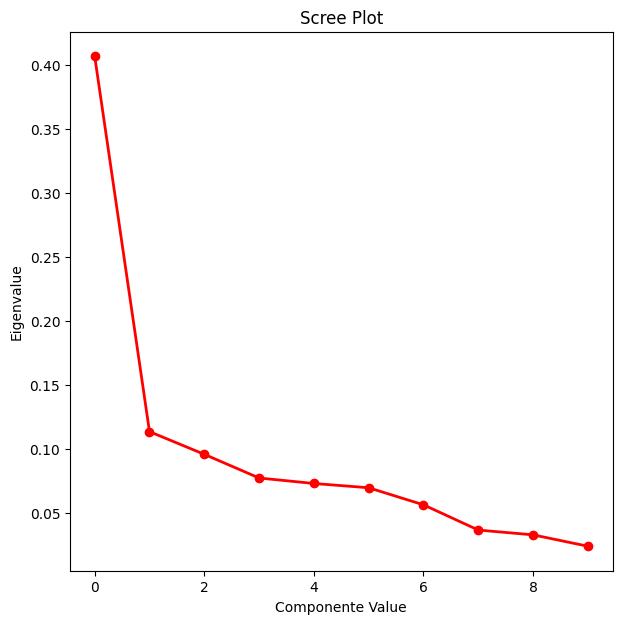

In [15]:
fig = plt.figure(figsize = (7,7))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Componente Value')
plt.ylabel('Eigenvalue')

In [16]:
pca.transform(x)

array([[-0.5747458 , -1.03000605, -0.92481018, ..., -0.38605016,
         0.58900096,  0.31691339],
       [-3.4459647 , -1.06965421, -0.48742613, ..., -0.35361894,
         0.27777331,  0.01136052],
       [-0.71153417, -1.25550577, -1.12036973, ...,  0.26210954,
         0.48846996,  0.34926499],
       ...,
       [-0.67332242, -1.72728666, -1.09686962, ...,  0.3622901 ,
        -0.01191355,  0.4376241 ],
       [ 3.80070725, -0.8600752 , -1.29030622, ...,  0.73167726,
        -0.06608066, -0.50641621],
       [ 1.20404792, -0.55370887, -1.26014924, ...,  1.02445765,
        -0.38453617,  1.23961534]])

In [23]:
pca.components_[:10]

array([[ 0.02236732,  0.07352569, -0.27246647, -0.37294506, -0.398917  ,
        -0.39583821, -0.3862694 , -0.13605709,  0.02382736, -0.06717635,
        -0.21320289, -0.34162772, -0.34743988, -0.09627872],
       [-0.32894973, -0.47418108, -0.24310087, -0.19062131, -0.12179285,
        -0.0556761 , -0.03185008,  0.35014898, -0.08282766,  0.61900306,
         0.13179789,  0.10256212,  0.08681195, -0.06713118],
       [ 0.64582557, -0.30766996, -0.03168689, -0.06950164, -0.08582578,
        -0.09173162, -0.08881458,  0.57395568,  0.08650106, -0.27170043,
        -0.06061322,  0.08905354,  0.11991496,  0.14843327],
       [ 0.01624602,  0.25178542, -0.44103327, -0.20787957, -0.05878722,
         0.01439302,  0.06862335, -0.13499267,  0.65664085,  0.01812251,
         0.27583064,  0.24791942,  0.21298912,  0.24000843],
       [ 0.28704114,  0.01142729, -0.25134321, -0.10073997,  0.03187118,
         0.11469759,  0.13707032, -0.07465682, -0.14503366, -0.09676919,
         0.45241356, -0.00